In [1]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
orders_data = "../orders_autumn_2020.csv"

In [3]:
df = pd.read_csv(orders_data)
print('Total rows: {}'.format(len(df)))
df = df.dropna() #remove invalid rows.
print('rows after cleanup: {}'.format(len(df)))
df.head()

Total rows: 18706
rows after cleanup: 18429


,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [4]:
df['HOUR_OF_DAY'] = pd.to_datetime(df['TIMESTAMP']).dt.hour + 1
df['WEEKDAY'] = pd.to_datetime(df['TIMESTAMP']).dt.dayofweek + 1
df.drop(['TIMESTAMP','ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES'], axis=1, inplace=True)

In [5]:
df.head()

,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,HOUR_OF_DAY,WEEKDAY
0,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,7,6
1,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,7,6
2,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,7,6
3,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,8,6
4,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,8,6


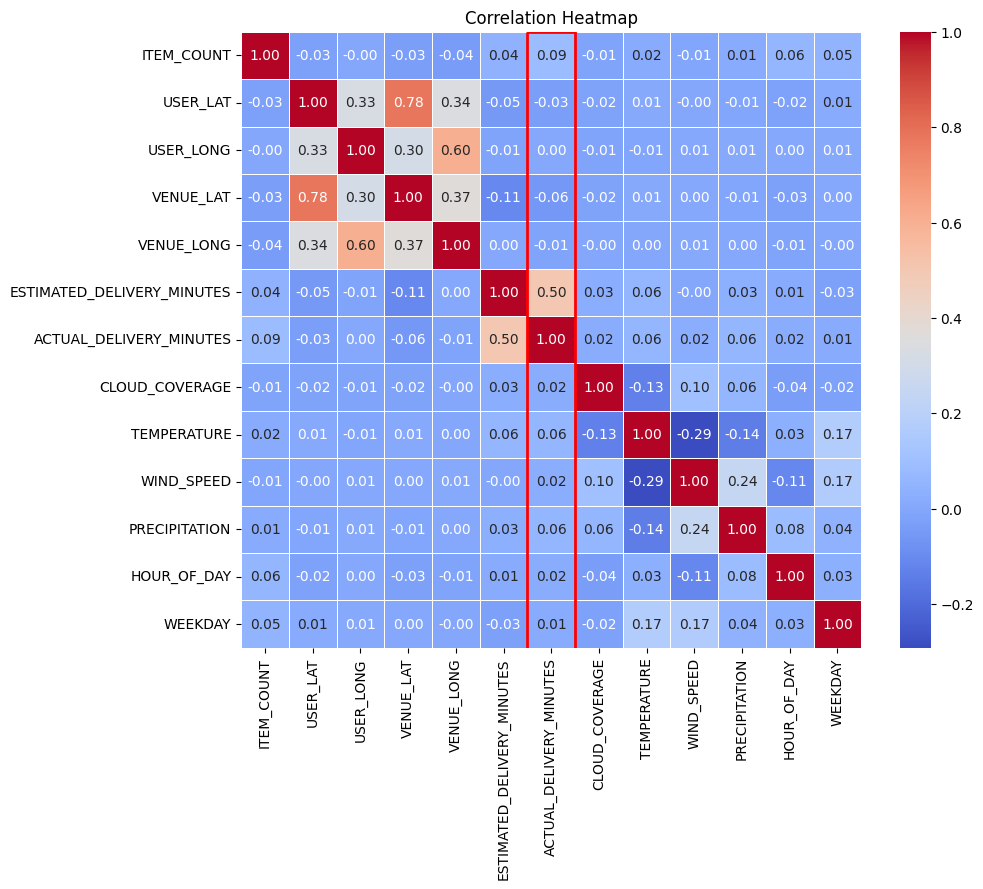

In [6]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
col_idx = df.columns.get_loc('ACTUAL_DELIVERY_MINUTES')
plt.gca().add_patch(plt.Rectangle((col_idx, 0), 1, df.shape[0], fill=False, edgecolor='red', lw=2))
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# data cleaned to remove Nan, infs. 
# the timestamp is divided into hour (1-24) and Day(1-7) to make more sense.
# lat,long are kept as they are because they may contain dependent variables (terrain, traffic, road). 

In [8]:
differences = df['ACTUAL_DELIVERY_MINUTES']-df['ESTIMATED_DELIVERY_MINUTES']
outliers_percentage = utils.percentage_outliers(differences)
print(f"Percentage of outliers in estimations: {outliers_percentage:.2f}%")

Percentage of outliers in estimations: 0.63%


In [9]:
# Calculate and display percentage of outliers for each column
for column in df.columns:
    outliers_percentage = utils.percentage_outliers(df[column])
    print(f"Percentage of outliers in {column}: {outliers_percentage:.2f}%")

Percentage of outliers in ITEM_COUNT: 1.03%
Percentage of outliers in USER_LAT: 0.00%
Percentage of outliers in USER_LONG: 0.00%
Percentage of outliers in VENUE_LAT: 0.01%
Percentage of outliers in VENUE_LONG: 1.26%
Percentage of outliers in ESTIMATED_DELIVERY_MINUTES: 1.82%
Percentage of outliers in ACTUAL_DELIVERY_MINUTES: 0.00%
Percentage of outliers in CLOUD_COVERAGE: 8.92%
Percentage of outliers in TEMPERATURE: 1.32%
Percentage of outliers in WIND_SPEED: 1.61%
Percentage of outliers in PRECIPITATION: 8.89%
Percentage of outliers in HOUR_OF_DAY: 0.00%
Percentage of outliers in WEEKDAY: 0.00%


## Data pre-process and split

In [10]:
item_count_bins = [i for i in range(1, 11)] + [np.inf]  # Bins for ITEM_COUNT ranging from 1 to 11
item_count_labels = [i for i in range(1, 11)]  # Labels for ITEM_COUNT categories (1 to 10)
cloud_coverage_bins = [i for i in range(0, 100, 10)] + [np.inf] # Bins for CLOUD_COVERAGE ranging from 0 to 100 with a step of 10
cloud_coverage_labels = [i for i in range(10)]  # Labels for CLOUD_COVERAGE categories (0 to 9)

df['CLOUD_COVERAGE_CATEGORIZED'] = pd.cut(df['CLOUD_COVERAGE'], bins=cloud_coverage_bins, labels=cloud_coverage_labels, right=False)
df['ITEM_COUNT_CATEGORIZED'] = pd.cut(df['ITEM_COUNT'], bins=item_count_bins, labels=item_count_labels, right=False)


In [11]:
assert not df.isna().any().any(), "Having NaN values"

In [12]:
df.head()

,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,HOUR_OF_DAY,WEEKDAY,CLOUD_COVERAGE_CATEGORIZED,ITEM_COUNT_CATEGORIZED
0,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,7,6,0,1
1,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,7,6,0,8
2,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,7,6,0,4
3,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,8,6,0,3
4,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,8,6,0,2


In [13]:
cats = ['HOUR_OF_DAY','WEEKDAY','CLOUD_COVERAGE_CATEGORIZED','ITEM_COUNT_CATEGORIZED']
for cat in cats:
    target_means = df.groupby(cat)['ACTUAL_DELIVERY_MINUTES'].mean()
    df[cat+'_mean'] = df[cat].map(target_means)

In [14]:
df.head()


,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,HOUR_OF_DAY,WEEKDAY,CLOUD_COVERAGE_CATEGORIZED,ITEM_COUNT_CATEGORIZED,HOUR_OF_DAY_mean,WEEKDAY_mean,CLOUD_COVERAGE_CATEGORIZED_mean,ITEM_COUNT_CATEGORIZED_mean
0,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,7,6,0,1,29.561856,31.659529,32.508503,31.746966
1,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,7,6,0,8,29.561856,31.659529,32.508503,34.990654
2,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,7,6,0,4,29.561856,31.659529,32.508503,33.237195
3,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,8,6,0,3,27.614094,31.659529,32.508503,32.628403
4,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,8,6,0,2,27.614094,31.659529,32.508503,32.812229


In [15]:
X = df.drop(columns=['ESTIMATED_DELIVERY_MINUTES','ACTUAL_DELIVERY_MINUTES','CLOUD_COVERAGE','ITEM_COUNT']+cats)  
y = df['ACTUAL_DELIVERY_MINUTES'] 
split_indices = utils.splited_indices(X,y)

In [16]:
X.head()

,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,TEMPERATURE,WIND_SPEED,PRECIPITATION,HOUR_OF_DAY_mean,WEEKDAY_mean,CLOUD_COVERAGE_CATEGORIZED_mean,ITEM_COUNT_CATEGORIZED_mean
0,60.158,24.946,60.160,24.946,15.0,3.53644,0.0,29.561856,31.659529,32.508503,31.746966
1,60.163,24.927,60.153,24.910,15.0,3.53644,0.0,29.561856,31.659529,32.508503,34.990654
2,60.161,24.937,60.162,24.939,15.0,3.53644,0.0,29.561856,31.659529,32.508503,33.237195
3,60.185,24.954,60.190,24.911,16.7,3.52267,0.0,27.614094,31.659529,32.508503,32.628403
4,60.182,24.955,60.178,24.949,16.7,3.52267,0.0,27.614094,31.659529,32.508503,32.812229


## Esimation performance

In [17]:
cv_minute_error_scores = []
cv_f1_scores = []

for (_, val_idx) in tqdm(split_indices):
    y_pred = df['ESTIMATED_DELIVERY_MINUTES'].iloc[val_idx]
    y_true = df['ACTUAL_DELIVERY_MINUTES'].iloc[val_idx]
    cv_minute_error_score = utils.minute_error(y_pred, y_true)
    f1,p,r = utils.f1_score(y_true,y_pred,threshold=1)
    cv_minute_error_scores.append(cv_minute_error_score)
    cv_f1_scores.append(f1)

100%|██████████| 5/5 [00:00<00:00, 599.22it/s]


In [18]:
# Display cross-validation results for minute error
print("Cross-validation minute error scores:", cv_minute_error_scores)
print("Mean minute error: {:.2f}".format(np.mean(cv_minute_error_scores)))
print("F-scores:", cv_f1_scores)

Cross-validation minute error scores: [7.329172320217096, 7.280325644504749, 7.255088195386703, 7.204341926729986, 7.195929443690638]
Mean minute error: 7.25
F-scores: [0.2262334536209193, 0.22836538456589797, 0.22751322746411703, 0.23218997356548665, 0.23894862599615185]


## Linear regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
cv_minute_error_scores = []
cv_f1_scores = []
for train_idx, val_idx in tqdm(split_indices):
    # Get the data subsets for this split
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Evaluate the model on the validation set and compute minute error
    cv_minute_error_score = utils.minute_error(y_pred,y_val)
    
    f1,p,r = utils.f1_score(y_val,y_pred,threshold=1)
    # Store the minute error score for this split
    cv_minute_error_scores.append(cv_minute_error_score)
    cv_f1_scores.append(f1)

100%|██████████| 5/5 [00:00<00:00, 15.52it/s]


In [21]:
# Display cross-validation results for minute error
print("Cross-validation minute error scores:", cv_minute_error_scores)
print("Mean minute error: {:.2f}".format(np.mean(cv_minute_error_scores)))
print("F-scores:", cv_f1_scores)

Cross-validation minute error scores: [7.900236047201147, 7.884129191989999, 7.810562757805431, 7.899835522821589, 7.882068152782879]
Mean minute error: 7.88
F-scores: [0.1303906645872709, 0.1322858590478715, 0.13133874234359105, 0.1351214574400076, 0.13464945578398238]


## Model LSTM

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for all features
numeric_transformer = StandardScaler()

# Apply the scaler directly to your data
X_processed = numeric_transformer.fit_transform(X)

In [24]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Model

UNITS = 64
NUM_LSTM_LAYERS = 2  
NUM_CLASSES = 60

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.lstm_layers = [LSTM(UNITS, return_sequences=True) for _ in range(NUM_LSTM_LAYERS)]
        self.dropout = Dropout(0.5)
        self.logits = Dense(NUM_CLASSES, activation='softmax')

    def call(self, inputs):
        lstm_output = inputs
        for layer in self.lstm_layers:
            lstm_output = layer(lstm_output)
        lstm_output = tf.reshape(lstm_output, [-1, UNITS]) 
        lstm_output = self.dropout(lstm_output)
        logits = self.logits(lstm_output)
        return logits

In [25]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.legacy.Adam()
train_loss = tf.keras.metrics.Mean()

model = MyModel()

In [26]:
@tf.function
def train_step(input, labels):
  with tf.GradientTape() as tape:
    predictions = model(input, training=True)
    loss = loss_function(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)

In [27]:
best_f1_scores = list()
for i,(train_idx, test_idx) in enumerate(split_indices):
    train_loss.reset_states()
    best_f1 = 0
    no_progress = 0
    X_train, X_test = X_processed[train_idx], X_processed[test_idx]
    y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values
    timesteps = utils.timestep(len(X_train))
    X_train = utils.sliding_window(X_train,timesteps)
    y_train = utils.sliding_window(y_train,timesteps)
    timesteps = utils.timestep(len(X_train))
    batch_size = timesteps*10
    num_batches = (len(X_train) // batch_size)
    remainder = len(X_train) % batch_size
    for epoch in range(1,21):
        pbar = tqdm(total=num_batches + (1 if remainder else 0))
        start = 0
        for j in range(num_batches + (1 if remainder else 0)):
            if j < num_batches:
                _X_train = X_train[start:start+batch_size]
                _y_train = y_train[start:start+batch_size]
                start += batch_size
            else:
                _X_train = X_train[start:start+remainder]
                _y_train = y_train[start:start+remainder]
            _X_train = np.reshape(_X_train, (-1, timesteps, _X_train.shape[-1]))
            train_step(_X_train, _y_train)
            pbar.set_description(f"Training Loss: {np.mean(train_loss.result().numpy()):.4f}")
            pbar.update(1)
        pbar.close()
        test_timesteps = utils.timestep(len(X_test))
        X_test = np.reshape(X_test, (-1, test_timesteps, X_test.shape[-1]))
        logits = model(X_test, training=False)
        predictions = tf.argmax(logits, axis=1) + 1
        f1,p,r = utils.f1_score(y_test,predictions,threshold=1)
        if f1>best_f1:
            model.save_weights("model_weights.h5")
            best_f1 = f1
            no_progress=0
        else:
            print("no progress with {:.4f}<{:.4f}".format(f1,best_f1))
            no_progress+=1
        if no_progress>4:
            best_f1_scores.append(best_f1)
            break
        print("Epoch: {} -- F-score: {:.4f}".format(epoch,f1))
    print()
    


Training Loss: 3.7519: 100%|██████████| 1473/1473 [00:43<00:00, 33.78it/s]


Epoch: 1 -- F-score: 0.20112277271126483


Training Loss: 3.7133: 100%|██████████| 1473/1473 [00:29<00:00, 50.08it/s]


Epoch: 2 -- F-score: 0.2063762472126945


Training Loss: 3.6912: 100%|██████████| 1473/1473 [00:26<00:00, 54.75it/s]


Epoch: 3 -- F-score: 0.21290009694342735


Training Loss: 3.6726: 100%|██████████| 1473/1473 [00:27<00:00, 53.33it/s]


Epoch: 4 -- F-score: 0.2309169466617325


Training Loss: 3.6562: 100%|██████████| 1473/1473 [00:26<00:00, 55.99it/s]


no progress with 0.2215<0.2309
Epoch: 5 -- F-score: 0.22152509647562416


Training Loss: 3.6400: 100%|██████████| 1473/1473 [00:27<00:00, 53.73it/s]


no progress with 0.2228<0.2309
Epoch: 6 -- F-score: 0.22281167103798993


Training Loss: 3.6228: 100%|██████████| 1473/1473 [00:26<00:00, 55.90it/s]


no progress with 0.2271<0.2309
Epoch: 7 -- F-score: 0.2270868414226792


Training Loss: 3.6043: 100%|██████████| 1473/1473 [00:26<00:00, 55.92it/s]


no progress with 0.2112<0.2309
Epoch: 8 -- F-score: 0.21116504849401954


Training Loss: 3.5845: 100%|██████████| 1473/1473 [00:26<00:00, 56.01it/s]


no progress with 0.2138<0.2309



Training Loss: 3.6298: 100%|██████████| 1473/1473 [00:26<00:00, 55.49it/s]


Epoch: 1 -- F-score: 0.22836538456540606


Training Loss: 3.6052: 100%|██████████| 1473/1473 [00:26<00:00, 55.79it/s]


no progress with 0.2168<0.2284
Epoch: 2 -- F-score: 0.2167916766981847


Training Loss: 3.5855: 100%|██████████| 1473/1473 [00:26<00:00, 55.93it/s]


no progress with 0.2159<0.2284
Epoch: 3 -- F-score: 0.21592834659734386


Training Loss: 3.5640: 100%|██████████| 1473/1473 [00:26<00:00, 55.81it/s]


no progress with 0.2090<0.2284
Epoch: 4 -- F-score: 0.2089914944822242


Training Loss: 3.5400: 100%|██████████| 1473/1473 [00:26<00:00, 56.07it/s]


no progress with 0.2099<0.2284
Epoch: 5 -- F-score: 0.209861549622152


Training Loss: 3.5140: 100%|██████████| 1473/1473 [00:26<00:00, 56.03it/s]


no progress with 0.2020<0.2284



Training Loss: 3.6241: 100%|██████████| 1473/1473 [00:26<00:00, 56.15it/s]


Epoch: 1 -- F-score: 0.22366835377042943


Training Loss: 3.5962: 100%|██████████| 1473/1473 [00:26<00:00, 56.06it/s]


no progress with 0.2228<0.2237
Epoch: 2 -- F-score: 0.2228116710378409


Training Loss: 3.5731: 100%|██████████| 1473/1473 [00:26<00:00, 56.07it/s]


no progress with 0.2224<0.2237
Epoch: 3 -- F-score: 0.22238301972853106


Training Loss: 3.5481: 100%|██████████| 1473/1473 [00:26<00:00, 56.11it/s]


no progress with 0.2224<0.2237
Epoch: 4 -- F-score: 0.2223830197284016


Training Loss: 3.5208: 100%|██████████| 1473/1473 [00:26<00:00, 56.55it/s]


no progress with 0.2164<0.2237
Epoch: 5 -- F-score: 0.2163601161168536


Training Loss: 3.4922: 100%|██████████| 1473/1473 [00:26<00:00, 56.41it/s]


no progress with 0.2129<0.2237



Training Loss: 3.6114: 100%|██████████| 1473/1473 [00:26<00:00, 56.42it/s]


Epoch: 1 -- F-score: 0.21765417165497244


Training Loss: 3.5818: 100%|██████████| 1473/1473 [00:26<00:00, 56.48it/s]


Epoch: 2 -- F-score: 0.2236683537702226


Training Loss: 3.5562: 100%|██████████| 1473/1473 [00:26<00:00, 56.30it/s]


no progress with 0.2168<0.2237
Epoch: 3 -- F-score: 0.21679167669811755


Training Loss: 3.5290: 100%|██████████| 1473/1473 [00:26<00:00, 56.33it/s]


no progress with 0.2207<0.2237
Epoch: 4 -- F-score: 0.22066634471098168


Training Loss: 3.5002: 100%|██████████| 1473/1473 [00:26<00:00, 56.02it/s]


no progress with 0.2046<0.2237
Epoch: 5 -- F-score: 0.20462850177703024


Training Loss: 3.4707: 100%|██████████| 1473/1473 [00:27<00:00, 53.35it/s]


no progress with 0.2198<0.2237
Epoch: 6 -- F-score: 0.21980676323502144


Training Loss: 3.4410: 100%|██████████| 1473/1473 [00:26<00:00, 56.04it/s]


no progress with 0.2077<0.2237



Training Loss: 3.6153: 100%|██████████| 1473/1473 [00:26<00:00, 56.16it/s]


Epoch: 1 -- F-score: 0.2253792438702325


Training Loss: 3.5845: 100%|██████████| 1473/1473 [00:26<00:00, 55.92it/s]


Epoch: 2 -- F-score: 0.23346116965284278


Training Loss: 3.5585: 100%|██████████| 1473/1473 [00:26<00:00, 55.78it/s]


no progress with 0.2232<0.2335
Epoch: 3 -- F-score: 0.2232401156684156


Training Loss: 3.5315: 100%|██████████| 1473/1473 [00:26<00:00, 55.78it/s]


Epoch: 4 -- F-score: 0.23894862599539005


Training Loss: 3.5030: 100%|██████████| 1473/1473 [00:26<00:00, 55.83it/s]


no progress with 0.2194<0.2389
Epoch: 5 -- F-score: 0.21937666097922387


Training Loss: 3.4734: 100%|██████████| 1473/1473 [00:26<00:00, 56.15it/s]


no progress with 0.2330<0.2389
Epoch: 6 -- F-score: 0.2330376408035027


Training Loss: 3.4438: 100%|██████████| 1473/1473 [00:26<00:00, 55.89it/s]


no progress with 0.2177<0.2389
Epoch: 7 -- F-score: 0.21765417165494735


Training Loss: 3.4144: 100%|██████████| 1473/1473 [00:26<00:00, 55.99it/s]


no progress with 0.2284<0.2389
Epoch: 8 -- F-score: 0.22836538456537922


Training Loss: 3.3856: 100%|██████████| 1473/1473 [00:26<00:00, 55.54it/s]


no progress with 0.2107<0.2389



In [28]:
print(best_f1_scores)

[0.2309169466617325, 0.22836538456540606, 0.22366835377042943, 0.2236683537702226, 0.23894862599539005]
